#Code use to analyse absorbance results
This notebook was made on Google Colab ([link to notebook](https://colab.research.google.com/drive/1yE8KR5lgvR6_-OCQKM2hPjLPr2i5-Dx7)). If you are running on your local machine remove the cells related to data retrieval and RDKit installation, and change the paths to the files as needed.

#Software installation and data retrieval, etc.
Install RDKit and xTB. Get the scoring functions used in the GA.

In [0]:
# Install RDKit. Takes 2-3 minutes
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

In [2]:
%%bash
rm scoring_functions.py sascorer.py SA_scores.txt cycle_scores.txt logP_values.txt fpscores.pkl.gz
wget https://raw.githubusercontent.com/jensengroup/GB-GA/master/scoring_functions.py
wget https://raw.githubusercontent.com/jensengroup/GB-GA/master/sascorer.py
wget https://raw.githubusercontent.com/jensengroup/GB-GA/master/SA_scores.txt
wget https://raw.githubusercontent.com/jensengroup/GB-GA/master/cycle_scores.txt
wget https://raw.githubusercontent.com/jensengroup/GB-GA/master/logP_values.txt
wget https://github.com/jensengroup/GB-GA/blob/master/fpscores.pkl.gz?raw=true

wget wget https://github.com/grimme-lab/xtb4stda/archive/v1.0.zip
rm -r xtb4stda-1.0
unzip v1.0.zip
wget https://github.com/grimme-lab/xtb4stda/releases/download/v1.0/xtb4stda
wget https://github.com/grimme-lab/xtb4stda/releases/download/v1.0/stda_v1.6.1
chmod +x xtb4stda
chmod +x stda_v1.6.1
mv xtb4stda xtb4stda-1.0/.
mv stda_v1.6.1 xtb4stda-1.0/.

rm data.zip
wget https://github.com/jensengroup/GA_ChemSpace_exploration/blob/master/data.zip?raw=true
mv data.zip?raw=true data.zip
unzip data.zip


Archive:  v1.0.zip
e72e89bc797a0d04a4436e970370490cce354e75
   creating: xtb4stda-1.0/
   creating: xtb4stda-1.0/.github/
   creating: xtb4stda-1.0/.github/ISSUE_TEMPLATE/
  inflating: xtb4stda-1.0/.github/ISSUE_TEMPLATE/bug_report.md  
  inflating: xtb4stda-1.0/.github/ISSUE_TEMPLATE/feature_request.md  
 extracting: xtb4stda-1.0/.github/dco.yml  
  inflating: xtb4stda-1.0/.gitignore  
  inflating: xtb4stda-1.0/.param_gbsa_acetone  
  inflating: xtb4stda-1.0/.param_gbsa_acetonitrile  
  inflating: xtb4stda-1.0/.param_gbsa_benzene  
  inflating: xtb4stda-1.0/.param_gbsa_ch2cl2  
  inflating: xtb4stda-1.0/.param_gbsa_chcl3  
  inflating: xtb4stda-1.0/.param_gbsa_cs2  
  inflating: xtb4stda-1.0/.param_gbsa_dmso  
  inflating: xtb4stda-1.0/.param_gbsa_ether  
  inflating: xtb4stda-1.0/.param_gbsa_h2o  
  inflating: xtb4stda-1.0/.param_gbsa_methanol  
  inflating: xtb4stda-1.0/.param_gbsa_thf  
  inflating: xtb4stda-1.0/.param_gbsa_toluene  
  inflating: xtb4stda-1.0/.param_stda1.xtb  
  i

rm: cannot remove 'scoring_functions.py': No such file or directory
rm: cannot remove 'sascorer.py': No such file or directory
rm: cannot remove 'SA_scores.txt': No such file or directory
rm: cannot remove 'cycle_scores.txt': No such file or directory
rm: cannot remove 'logP_values.txt': No such file or directory
rm: cannot remove 'fpscores.pkl.gz': No such file or directory
--2020-04-08 12:32:19--  https://raw.githubusercontent.com/jensengroup/GB-GA/master/scoring_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6998 (6.8K) [text/plain]
Saving to: ‘scoring_functions.py’

     0K ......                                                100% 64.4M=0s

2020-04-08 12:32:19 (64.4 MB/s) - ‘scoring_functions.py’ saved [6998/6998]

--2020-04-08 12:32:19--  http

In [0]:
import os
os.environ['XTB4STDAHOME'] = "/content/xtb4stda-1.0"

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem import AllChem
from collections import defaultdict
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import scoring_functions as sc

import matplotlib.pyplot as plt
import numpy as np
import pickle

#Figure 7

In [0]:
def median(found):
  if found:
    return ' ('+str(int(np.median(found)))+')'
  else:
    return ''

Text(10, 0.9, 'Success: 0.97 (20)')

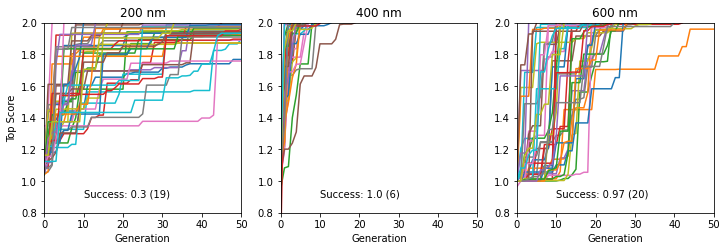

In [5]:
high_score_list_200 = pickle.load(open('data/GA_absorbance_200.p', "rb"))
high_score_list_400 = pickle.load(open('data/GA_absorbance_400.p', "rb"))
high_score_list_600 = pickle.load(open('data/GA_absorbance_600.p', "rb"))

x = 10
y = 0.9

fig = plt.figure(figsize=(12, 3.5))

plt.subplot(1, 3, 1)
for i, high_score in enumerate(high_score_list_200):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('200 nm')
plt.xlabel('Generation')
plt.ylabel('Top Score')
#plt.legend()
plt.axis((0,50,0.8,2.0))
found = [len(x) for x in high_score_list_200 if len(x) != 51]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))

plt.subplot(1, 3, 2)
for i, high_score in enumerate(high_score_list_400):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('400 nm')
plt.xlabel('Generation')
#plt.ylabel('Top Score')
#plt.legend()
plt.axis((0,50,0.8,2.0))
found = [len(x) for x in high_score_list_400 if len(x) != 51]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))


plt.subplot(1, 3, 3)
for i, high_score in enumerate(high_score_list_600):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('600 nm')
plt.xlabel('Generation')
#plt.ylabel('Top Score')
#plt.legend()
plt.axis((0,50,0.8,2.0))
found = [len(x) for x in high_score_list_600 if len(x) != 51]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))

In [0]:
fig.tight_layout()
fig.savefig('absorbance.png')

#Figure S4, 200 nm
Scores depend on stochastic conformer search so numbers maybe different from the ones in the figure, especially for molecules with many rotatable bonds.

Running this cell takes 5-10 minutes

In [0]:
mols = []
for i, high_score in enumerate(high_score_list_200):
  mols.append(Chem.MolFromSmiles(high_score[-1][1]))

target = 200. # nm
sigma = 50. # nm
threshold = 0.3
n_confs = 20
xtb_path = '/content/xtb4stda-1.0'
args = [n_confs, xtb_path, target, sigma, threshold]

data = []
for mol in mols:
  wl, os = sc.compute_absorbance(mol,n_confs,xtb_path) 
  data.append((wl,os))

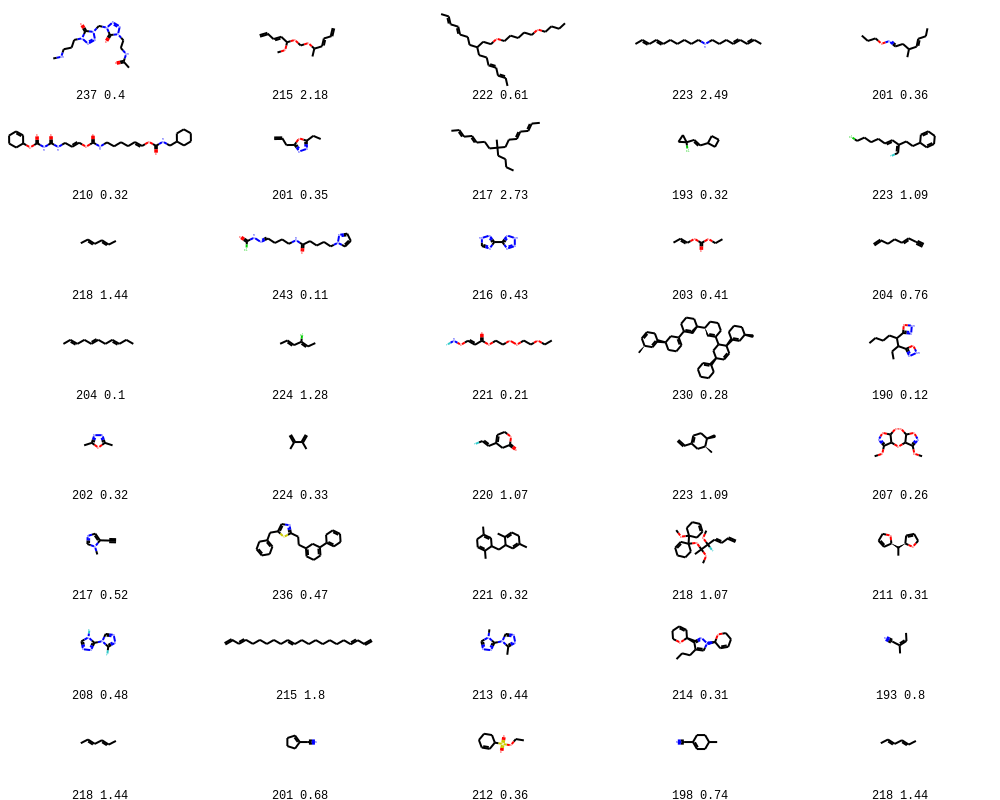

In [8]:
labels = []
for d in data:
  labels.append(str(int(d[0]))+' '+str(round(d[1],2)))

img = Draw.MolsToGridImage(mols,molsPerRow=5,legends=labels,subImgSize=(200,100))
img

##Distribution of scores

1.9458291806599088 1.9620080828823525


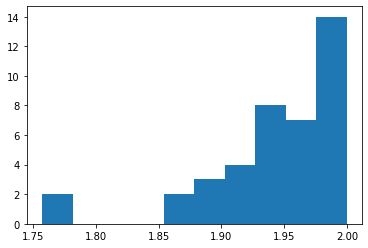

In [6]:
l200 = [x[-1][0] for x in high_score_list_200]

print(np.mean(l200), np.median(l200))
n, bins, patches = plt.hist(l200)

In [0]:
for i,s in enumerate(l200):
  print(i+1,s)

1 1.767212087648006
2 1.9697160328339263
3 1.9412448230150239
4 1.9372548956126776
5 1.999712041468019
6 1.9923414770836891
7 1.9992782605792834
8 1.9399280022524175
9 1.9925856231157826
10 1.8928934697630906
11 1.9324516301148804
12 1.870804310141282
13 1.9451156292300924
14 1.9969626221939074
15 1.9923414770836891
16 1.9982016190284373
17 1.88860896466884
18 1.9260454161687908
19 1.870804310141282
20 1.9941849731002634
21 1.998942559484671
22 1.9260454161687908
23 1.9178713865263242
24 1.8954311006252471
25 1.984116166260315
26 1.943838696300543
27 1.75710146413657
28 1.908534879025579
29 1.974342884320645
30 1.9725361810666002
31 1.9866420203688748
32 1.9716107671891228
33 1.9657521994360767
34 1.9582639663286285
35 1.9918414629933738
36 1.9324516301148804
37 1.9997580292796382
38 1.96874680149753
39 1.9992003199146837
40 1.9324516301148804


#Figure S5, 400 nm
Scores depend on stochastic conformer search so numbers maybe different from the ones in the figure, especially for molecules with many rotatable bonds.

Running this cell takes 5-10 minutes

In [0]:
mols = []
for i, high_score in enumerate(high_score_list_400):
  mols.append(Chem.MolFromSmiles(high_score[-1][1]))

target = 400. # nm
sigma = 50. # nm
threshold = 0.3
n_confs = 20
xtb_path = '/content/xtb4stda-1.0'
args = [n_confs, xtb_path, target, sigma, threshold]

data = []
for mol in mols:
  wl, os = sc.compute_absorbance(mol,n_confs,xtb_path) 
  data.append((wl,os))

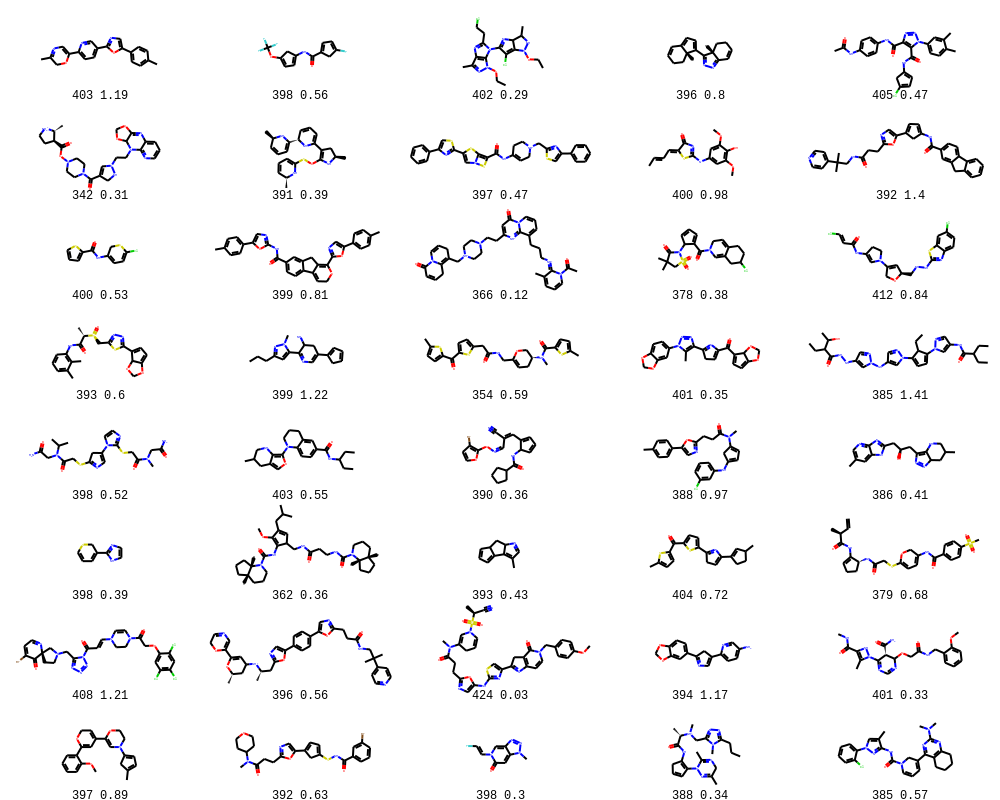

In [0]:
labels = []
for d in data:
  labels.append(str(int(d[0]))+' '+str(round(d[1],2)))

img = Draw.MolsToGridImage(mols,molsPerRow=5,legends=labels,subImgSize=(200,100))
img

##A closer look at the scores

In [0]:
for i,item in enumerate(high_score_list_400):
  print(i+1,item[-1])

1 (1.99782437012098, 'CC1=NC=C(c2ccc(-c3ncc(-c4ccc(C)cc4)o3)cn2)OC1')
2 (1.9996620571155648, 'O=C(NC1=CC=C(OC(F)(F)F)C1)C1=CC=C(F)C1')
3 (1.9987507809245808, 'CCON1NC(C)C2N=C(n3c(CCCl)nc4c(C)nn(OCC)c43)C(Cl)=C21')
4 (1.996805114543033, 'C1=CC2=CC=C(C3=NN=C4C=CCC[C@H]43)[C@@H]2CC1')
5 (1.9950124791926824, 'CC(=O)Nc1ccc(NC(=O)c2nnn(-c3ccc(C)c(C)c3)c2C(=O)NC2=CC=C(Cl)C2)cc1')
6 (1.9969626221939074, 'C[C@H]1[NH2+]CC[C@@H]1C(=O)ON1CCN(C(=O)C2=CN(CCN3c4ncccc4N=C4OCOC43)NC2)CC1')
7 (1.9957769422929579, 'C[C@@H]1C=CC=C(SOC2=C(C3=CC=C[C@@H](C4=CC=C[C@@H](C)N4)N3)C[C@@H](C)N2)N1')
8 (1.9988486632972693, 'O=C(NC1=CC[NH+](Cc2nc(-c3ccccc3)cs2)CC1)c1sn2cc(-c3nc(-c4ccccc4)cs3)sc12')
9 (1.9998720081916503, 'CC=C/C=C1\\SC([N-]c2cc(OC)c(O)c(OC)c2)=NC1=O')
10 (1.99106218190105, 'CC(C)(CNC(=O)CCc1ncc(C2=CC=C(NC(=O)c3ccc4c(c3)Cc3ccccc3-4)C2)o1)c1ccncc1')
11 (1.999998000002, 'O=C(NC1=CC=C(Cl)SC1)c1cccs1')
12 (1.9998000199986667, 'Cc1ccc(-c2cnc(NC(=O)c3ccc4c(c3)CC3=C(c5ncc(-c6ccc(C)cc6)o5)OCC=C34)o2)cc1')
13

#Figure S6, 600 nm
Scores depend on stochastic conformer search so numbers maybe different from the ones in the figure, especially for molecules with many rotatable bonds.

Running this cell takes 5-10 minutes

In [0]:
mols = []
for i, high_score in enumerate(high_score_list_600):
  mols.append(Chem.MolFromSmiles(high_score[-1][1]))

target = 600. # nm
sigma = 50. # nm
threshold = 0.3
n_confs = 20
xtb_path = '/content/xtb4stda-1.0'
args = [n_confs, xtb_path, target, sigma, threshold]

data = []
for mol in mols:
  wl, os = sc.compute_absorbance(mol,n_confs,xtb_path) 
  data.append((wl,os))

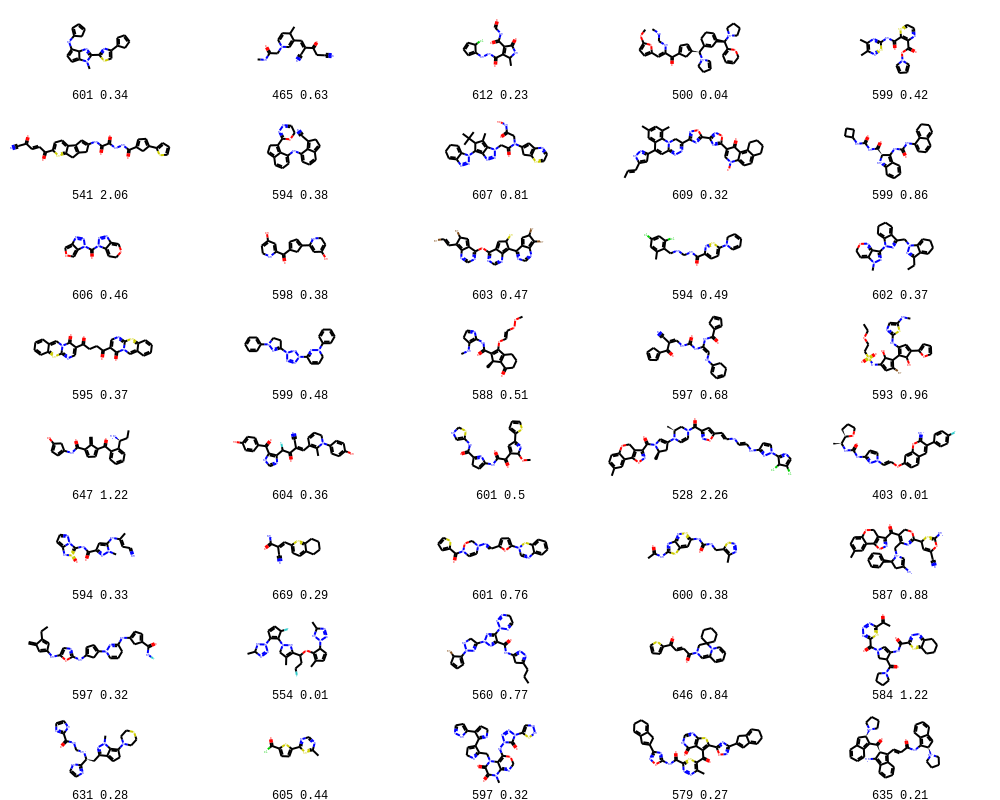

In [0]:
labels = []
for d in data:
  labels.append(str(int(d[0]))+' '+str(round(d[1],2)))

img = Draw.MolsToGridImage(mols,molsPerRow=5,legends=labels,subImgSize=(200,100))
img

##A closer look at the scores

In [0]:
for i,item in enumerate(high_score_list_600):
  print(i+1,item[-1])

1 (1.9997580292796382, 'CN1C2=CC=C(NC3=CC=CC3)C2N=C1c1nc(C2=CC=CC2)cs1')
2 (1.9582669603711045, 'CNC(=O)CN1C=CC(C)C(/C=C(\\C#N)C(=O)CC#N)=C1')
3 (2.0, 'CC1NC(=O)C(C(=O)NC=O)=C1C(=O)NNC1=CC=CC1Cl')
4 (1.9976906706134507, 'CNCN/C(=C\\c1ccc(OC)o1)C(=O)C1=CC=C([C@H](C2=CC([C@H](C3=CC=CCO3)[NH+]3CCCC3)=CCC2)[NH+]2C=CCC2)C1')
5 (1.9998720081916503, 'CC1=C(C)N=C(NC(=O)C2=C(C(=O)On3cccc3)N=CC=[SH]2)[SH]=N1')
6 (1.9979540957210769, 'N#CC(=O)C=CC(=O)C1=CC=C2C(=[SH]1)CC1=C2C=C(NC(=O)C(=O)NNC(=O)C2=CC=C(c3cccs3)C2)C1')
7 (1.9937476279350914, 'N#CC1=c2c(Nc3cccc4c3=C(C3=NN=CCO3)CC=4)cccc2=CC1')
8 (1.9999680005119944, 'CC1=c2c(nnn2CC(=O)N(CC(=O)NO)C2=CC3=C(C2)[SH]=CC=N3)=C(n2nnc3c2=CCCC=3)C1C(C)(C)C')
9 (1.990523190692997, 'CC=Cc1cc(C2=CC3=NN=C(c4noc(-c5noc(-c6cn([O-])c7ccc8c(c7c6=O)CCCC8)n5)n4)CN3c3c(C)cc(C)cc32)n[nH]1')
10 (1.9998380131212916, 'O=C(NC1=c2ccccc2=[NH+][C@@H]1C(=O)NC(=O)NC1CCC1)Nc1cccc2c1=CCCC=2')
11 (1.9913258395063427, 'O=C(n1nnc2c1=CCOC=2)n1nnc2cocc21')
12 (1.9996080768219615, 'O=C